# Dataset exploration

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [62]:
DATA_PATH = './data/our_datasets/'

## How many dataset do we have

In [63]:
# find all the files in the data directory and all its subdirectories        
all_dataset = [os.path.join(root, file) for root, dirs, files in os.walk(DATA_PATH) for file in files if file.endswith('.csv')]

print(f'Found {len(all_dataset)} datasets')

datasets = {filename: pd.read_csv(filename) for filename in all_dataset}

Found 35 datasets


In [64]:
# show histograms of the datasets columns number

is_numeric = lambda x: x[0].isupper() and x[-1] not in ['-','+']
is_symbolic = lambda x: x[0].islower() and x[-1] not in ['-','+']
is_x_column = lambda x: x[-1] not in ['-','+']

datasets_columns = pd.DataFrame(columns=['filename', 'columns', 'numeric', 'symbolic'])
for i, (filename, dataset) in enumerate(datasets.items()):
    columns = len([col for col in dataset.columns if is_x_column(col)])
    numeric = len([col for col in dataset.columns if is_numeric(col)])
    symbolic = len([col for col in dataset.columns if is_symbolic(col)])
    datasets_columns.loc[i] = [filename, columns, numeric, symbolic]
    
datasets_columns.sort_values(by='columns', inplace=True, ascending=False)


# datasets_columns
# datasets_columns.hist(bins=20)
# plt.title('Number of columns in datasets')
# plt.show()

Lenght of filtered_df: 35


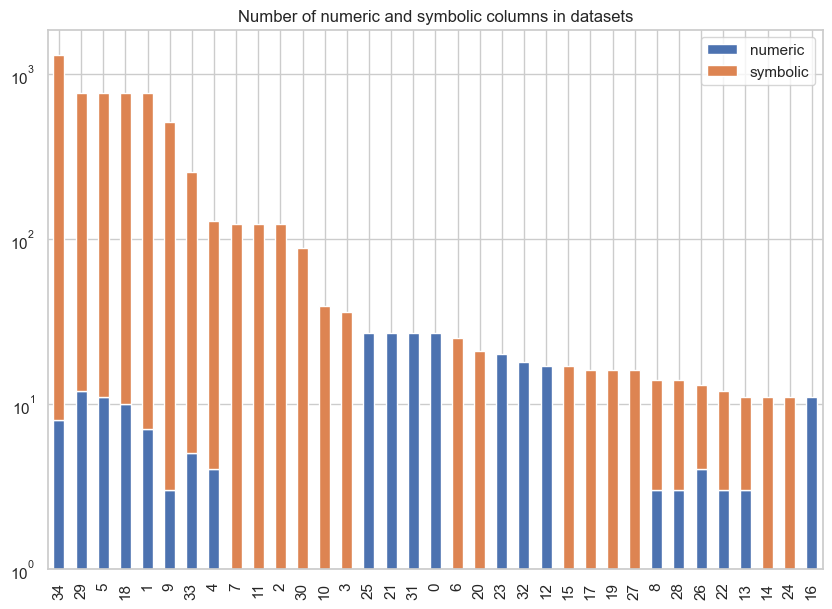

In [65]:
# barplot of the number of columns (numeric and symbolic) in the datasets with seaborn
filterr = datasets_columns['columns'] > 10
filtered_df = datasets_columns[filterr]
print(f'Lenght of filtered_df: {len(filtered_df)}')
filtered_df[['numeric', 'symbolic']].plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of numeric and symbolic columns in datasets')
# log scale
plt.yscale('log')
plt.show()

In [66]:
filtered_df

,filename,columns,numeric,symbolic
34,./data/our_datasets/FFM-1000-200-0.50-SAT-1.csv,1300,8,1292
29,./data/our_datasets/FM-500-100-0.25-SAT-1.csv,773,12,761
5,./data/our_datasets/FM-500-100-0.50-SAT-1.csv,769,11,758
18,./data/our_datasets/FM-500-100-0.75-SAT-1.csv,767,10,757
1,./data/our_datasets/FFM-500-100-0.50-SAT-1.csv,766,7,759
9,./data/our_datasets/FM-500-100-1.00-SAT-1.csv,511,3,508
33,./data/our_datasets/FFM-250-50-0.50-SAT-1.csv,256,5,251
4,./data/our_datasets/FFM-125-25-0.50-SAT-1.csv,128,4,124
7,./data/our_datasets/Scrum1k.csv,124,0,124
11,./data/our_datasets/Scrum100k.csv,124,0,124


In [67]:
# OUT_PATH = './data/our_datasets'
# # save all datasets with more than 10 columns
# for i, row in filtered_df.iterrows():
#     filename = row['filename']
#     dataset = datasets[filename]
#     dataset.columns = [col.strip() for col in dataset.columns]
#     dataset.to_csv(os.path.join(OUT_PATH, os.path.basename(filename)), index=False)